# 2D Gradient descent in Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Explanation of Polynomial Regression using Gradient Descent

1. Function to generate sample data for polynomial regression
Purpose: This function generates synthetic data for polynomial regression.
Parameters: It takes a seed value to ensure reproducibility.
Output: Random data points are generated based on a polynomial equation, the degree of which is provided by the user.
Example: For instance, with a degree of 2, the function generates data points following the equation 
𝑦= 1.5𝑋^2 + noise.

2. Function to perform polynomial regression using gradient descent
   Purpose: This function implements polynomial regression using gradient descent.
Parameters: It takes the input data 𝑋 and labels 𝑦, degree of the polynomial, learning rate, and number of epochs.
Output: The function iteratively updates model parameters (theta) using gradient descent and returns the final parameters along with the gradient history and MSEs over epochs.
Gradient Descent: It computes gradients, updates theta, and calculates MSE at each epoch.
3. Function to add polynomial features to input data
Purpose: This function adds polynomial features to input data to prepare it for polynomial regression.
Parameters: It takes the input data 𝑋 and the degree of the polynomial.
Output: Returns the input data with polynomial features up to the specified degree.

4. Function to calculate Mean Squared Error
Purpose: This function computes the Mean Squared Error (MSE) between predicted and actual values.
Parameters: It takes predicted values and actual labels.
Output: Returns the MSE value.

5. Function to compute gradients for gradient descent
Purpose: This function computes gradients for gradient descent.
Parameters: It takes the polynomial features, predicted values, and actual labels.
Output: Returns gradients for updating model parameters.

6. Function to update parameters using gradient descent
Purpose: This function updates model parameters (theta) using gradients.
Parameters: It takes current parameters, learning rate, and gradients.
Output: Returns updated parameters.

7. Function to plot the change in gradients over epochs
Purpose: This function plots the change in gradients over epochs to visualize the convergence of gradient descent.
Parameters: It takes the number of epochs and gradient history.
Output: Displays a plot showing the change in gradients over epochs.

8. Function to generate and plot predictions based on polynomial regression
Purpose: This function generates and plots predictions based on polynomial regression.
Parameters: It takes input data, labels, degree of the polynomial, learning rate, and number of epochs.
Output: Displays a scatter plot of original data points along with the fitted polynomial regression curve.

User Input and Execution
User Input: The user provides the degree of the polynomial.

Execution:
Sample data is generated based on the user's input.
Hyperparameters like learning rate and number of epochs are set.
Polynomial regression is performed, and predictions are generated and plotted.

Enter Degree: 2
Degree--> 2
Epoch 0, MSE: 4.64292208993349
Epoch 100, MSE: 1.1238882553831984
Epoch 200, MSE: 1.0503310391270426
Epoch 300, MSE: 1.0290502804299326
Epoch 400, MSE: 1.0206642094861467
Epoch 500, MSE: 1.0155804440570786
Epoch 600, MSE: 1.0114562392954547
Epoch 700, MSE: 1.0077134932352703
Epoch 800, MSE: 1.0042039421826991
Epoch 900, MSE: 1.0008843128204354


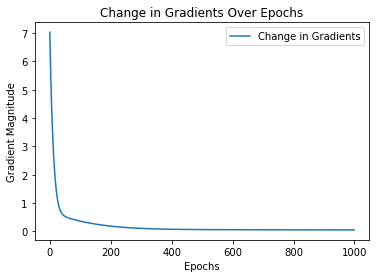

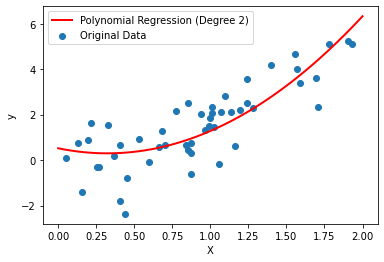

In [62]:
# Function to generate sample data for polynomial regression
def generate_sample_data(seed=42):
    # Set the degree of the polynomial
    print('Degree-->', degree)
    
    # Generate random data points
    np.random.seed(seed)
    X = 2 * np.random.rand(50, 1)
    y = 1.5 * X**degree + np.random.randn(50, 1)
    return X, y

# Function to perform polynomial regression using gradient descent
def polynomial_regression(X, y, degree, learning_rate, num_epochs):
    # Initialize parameters randomly
    theta = np.random.randn(degree + 1, 1)  # Adjusted to match the degree
    gradient_history = []
    MSEs = []
    Epochs = []

    # Perform gradient descent
    for epoch in range(num_epochs):
        X_poly = add_polynomial_features(X, degree)
        y_pred = X_poly.dot(theta)
        
        # Compute mean squared error
        mse = calculate_mse(y_pred, y)
        
        # Compute gradients
        gradients = compute_gradients(X_poly, y_pred, y)
        
        # Update parameters using gradient descent
        theta = update_parameters(theta, learning_rate, gradients)
        
        # Store values for visualization
        Epochs.append(epoch)
        MSEs.append(mse)
        gradient_history.append(np.linalg.norm(gradients))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, MSE: {mse}")

    # Plotting the change in gradients over epochs
    plot_gradient_changes(Epochs, gradient_history)

    return theta, Epochs, MSEs

# Function to add polynomial features to input data
def add_polynomial_features(X, degree):
    X_poly = np.c_[X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]
    return np.c_[np.ones((X.shape[0], 1)), X_poly]

# Function to calculate Mean Squared Error
def calculate_mse(y_pred, y):
    return np.mean((y_pred - y)**2)

# Function to compute gradients for gradient descent
def compute_gradients(X_poly, y_pred, y):
    return 2/X_poly.shape[0] * X_poly.T.dot(y_pred - y)

# Function to update parameters using gradient descent
def update_parameters(theta, learning_rate, gradients):
    return theta - learning_rate * gradients

# Function to plot the change in gradients over epochs
def plot_gradient_changes(Epochs, gradient_history):
    plt.plot(Epochs, gradient_history, label='Change in Gradients')
    plt.xlabel('Epochs')
    plt.ylabel('Gradient Magnitude')
    plt.title('Change in Gradients Over Epochs')
    plt.legend()
    plt.show()

# Function to generate and plot predictions based on polynomial regression
def generate_and_plot_predictions(X, y, degree, learning_rate, num_epochs):
    # Perform polynomial regression
    theta, _, _ = polynomial_regression(X, y, degree, learning_rate, num_epochs)

    # Generate new data for plotting predictions
    X_new = np.linspace(0, 2, 50).reshape(50, 1)
    X_new_poly = add_polynomial_features(X_new, degree)
    y_pred = X_new_poly.dot(theta)

    # Plot the original data and the polynomial regression predictions
    plt.scatter(X, y, label='Original Data')
    plt.plot(X_new, y_pred, 'r-', label=f'Polynomial Regression (Degree {degree})', linewidth=2)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Get user input for the degree of the polynomial
degree = int(input("Enter Degree: "))

# Generate sample data and set hyperparameters
X, y = generate_sample_data(degree)
learning_rate = 0.01
num_epochs = 1000

# Generate and plot predictions
generate_and_plot_predictions(X, y, degree, learning_rate, num_epochs)

In [ ]:
# my fuel efficiency function
def fuel_efficiency_2d(speed, engine_load):
    return (speed - 60)**2 + (engine_load - 30)**2 + 50

def efficiency_derivative_speed(speed):
    return 2 * (speed - 60)

def efficiency_derivative_load(engine_load):
    return 2 * (engine_load - 30)

# 2D gradient descent
def gradient_descent_2d(speed_init, load_init, learning_rate, epochs):
    speed = speed_init
    load = load_init

    speed_values = [speed] # lines for visualization
    load_values = [load]# lines for visualization
    efficiency_values = [fuel_efficiency_2d(speed, load)] # lines for visualization

    
    for _ in range(epochs):
        grad_speed = efficiency_derivative_speed(speed) #take speed partial derivative
        grad_load = efficiency_derivative_load(load)# get engine load derivative
        speed = speed - learning_rate * grad_speed # speed independent opt.
        load = load - learning_rate * grad_load #load independent opt.
        speed_values.append(speed)
        load_values.append(load)
        efficiency_values.append(fuel_efficiency_2d(speed, load))
    
    return speed_values, load_values, efficiency_values

# you can select any other initial values.
initial_speed = 70
initial_load = 40
learning_rate = 0.1
num_epochs = 50
speed_vals, load_vals, efficiency_vals = gradient_descent_2d(initial_speed, initial_load, learning_rate, num_epochs)

# Plotting the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

speed_vals = np.array(speed_vals)
load_vals = np.array(load_vals)
efficiency_vals = np.array(efficiency_vals)

ax.plot(speed_vals, load_vals, efficiency_vals, marker='o')
ax.set_xlabel('Speed')
ax.set_ylabel('Engine Load')
ax.set_zlabel('Function Value (Fuel Efficiency)')
ax.set_title('Gradient Descent in 2D: Speed vs Engine Load for Fuel Efficiency')

plt.show()